In [27]:
import pandas as pd
import numpy as np


### Datetime
- `pd.Timestamp` to represent datetime
- `pd.DateOffset` to add/subtract datetime
- `pd.to_datetime` to convert string to datetime

**Represent date & time**

In [7]:
pd.Timestamp(2019, 12, 12)

Timestamp('2019-12-12 00:00:00')

In [14]:
pd.to_datetime('2019-12-12', format='%Y-%m-%d')

Timestamp('2019-12-12 00:00:00')

In [53]:
pd.Timestamp(2019, 12, 12).year

2019

In [32]:
pd.to_timedelta(12, 'D')

Timedelta('12 days 00:00:00')

**Date Time Operations**

In [37]:
pd.Timestamp(2019, 12, 12) + pd.to_timedelta(3, 'D')

Timestamp('2019-12-15 00:00:00')

In [22]:
pd.Timestamp(2019, 12, 12) + pd.DateOffset(days=3) # Add

Timestamp('2019-12-15 00:00:00')

In [25]:
pd.Timestamp(2019, 12, 12) + pd.DateOffset(day=3)  # Replace

Timestamp('2019-12-03 00:00:00')

In [31]:
pd.to_timedelta(np.arange(12), 'D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

**Date Ranges**

In [38]:
pd.Timestamp(2019, 12, 12) + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23'],
              dtype='datetime64[ns]', freq=None)

In [74]:
pd.date_range('2019-12-12', '2019-12-25', freq='D')

DatetimeIndex(['2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23',
               '2019-12-24', '2019-12-25'],
              dtype='datetime64[ns]', freq='D')

### Time Series Data

In [49]:
daily_opsd = pd.read_csv('opsd_germany_daily.csv')

In [50]:
display(daily_opsd.shape)
display(daily_opsd.dtypes)
display(daily_opsd.head())

(4383, 5)

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN

In [51]:
daily_opsd['Date'] = pd.to_datetime(daily_opsd['Date'])
daily_opsd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

### Indexing

In [52]:
daily_opsd = daily_opsd.set_index('Date')
daily_opsd.head()

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN

In [58]:
daily_opsd['Year']  = daily_opsd.index.year
daily_opsd['Month'] = daily_opsd.index.month
daily_opsd['Weekday'] = daily_opsd.index.weekday_name

daily_opsd.sample(n=5)

Consumption     Wind    Solar  Wind+Solar  Year  Month    Weekday
Date                                                                         
2011-07-12     1401.985   67.055      NaN         NaN  2011      7    Tuesday
2016-03-18     1518.480  134.001  111.766     245.767  2016      3     Friday
2008-03-22     1208.581      NaN      NaN         NaN  2008      3   Saturday
2008-07-23     1326.747      NaN      NaN         NaN  2008      7  Wednesday
2016-05-29     1096.905  163.103  124.929     288.032  2016      5     Sunday

In [60]:
daily_opsd['2016-02-29':'2016-03-02'] # time indexing

Consumption     Wind   Solar  Wind+Solar  Year  Month    Weekday
Date                                                                        
2016-02-29     1544.110  245.950  43.416     289.366  2016      2     Monday
2016-03-01     1581.822  247.365  47.933     295.298  2016      3    Tuesday
2016-03-02     1573.211  359.877  33.769     393.646  2016      3  Wednesday

In [64]:
daily_opsd.loc['2017-02'] # partial time string matching

Consumption     Wind    Solar  Wind+Solar  Year  Month    Weekday
Date                                                                         
2017-02-01     1627.965  221.296   23.817     245.113  2017      2  Wednesday
2017-02-02     1604.120  254.391   42.219     296.610  2017      2   Thursday
2017-02-03     1574.576  188.038   24.223     212.261  2017      2     Friday
2017-02-04     1344.391  211.453   49.257     260.710  2017      2   Saturday
2017-02-05     1238.879  118.332   46.216     164.548  2017      2     Sunday
2017-02-06     1574.502  152.119   28.576     180.695  2017      2     Monday
2017-02-07     1621.574  264.513   29.271     293.784  2017      2    Tuesday
2017-02-08     1625.415  219.683   30.996     250.679  2017      2  Wednesday
2017-02-09     1637.740  207.538   45.278     252.816  2017      2   Thursday
2017-02-10     1622.785  290.957   33.900     324.857  2017      2     Friday
2017-02-11     1386.709  329.651   56.393     386.044  2017      2   Saturday
2017-02-12     1293.212  350.271   37.667     387.938  2017      2     Sunday
2017-02-13     1597.275  338.186   89.582     427.768  2017      2     Monday
2017-02-14     1593.560  205.089  110.288     315.377  2017      2    Tuesday
2017-02-15     1579.457   98.879  113.905     212.784  2017      2  Wednesday
2017-02-16     1576.044  282.404   92.428     374.832  2017      2   Thursday
2017-02-17     1556.106  255.288   31.449     286.737  2017      2     Friday
2017-02-18     1327.272  160.163   34.516     194.679  2017      2   Saturday
2017-02-19     1245.979  348.515   58.420     406.935  2017      2     Sunday
2017-02-20     1563.139  648.807   31.768     680.575  2017      2     Monday
2017-02-21     1566.902  580.922   35.746     616.668  2017      2    Tuesday
2017-02-22     1584.343  826.278   25.278     851.556  2017      2  Wednesday
2017-02-23     1561.235  705.403   50.721     756.124  2017      2   Thursday
2017-02-24     1539.603  522.109   70.540     592.649  2017      2     Friday
2017-02-25     1319.075  413.771   97.579     511.350  2017      2   Saturday
2017-02-26     1208.725  545.141   59.460     604.601  2017      2     Sunday
2017-02-27     1467.695  558.405   86.390     644.795  2017      2     Monday
2017-02-28     1532.536  602.224   49.108     651.332  2017      2    Tuesday

### Visualization

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates


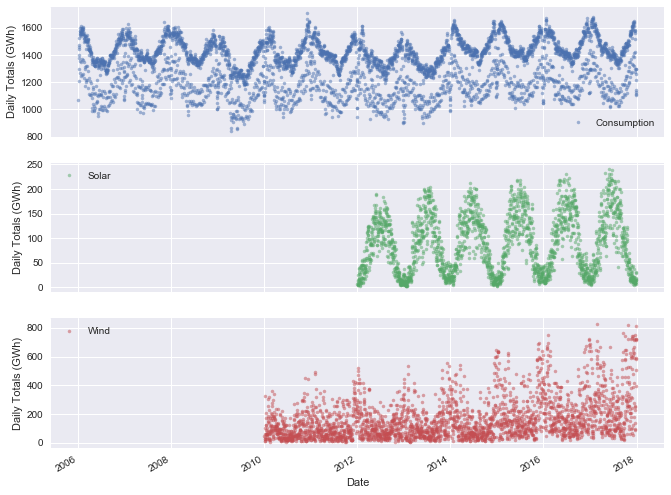

In [72]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = daily_opsd[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Text(0,0.5,'Daily Consumption (GWh)')

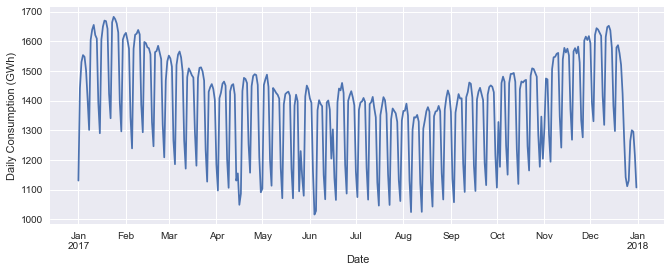

In [73]:
ax = daily_opsd.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)')

### Sampling
- Uniform time distribution (equal interval frequencies)
- Downsampling (typically with an aggregation function)
- Upsampling (rare, typically use interpolation)

In [76]:
selected_dates = pd.to_datetime(['2017-01-02', '2017-01-05', '2017-01-07'])
sample = daily_opsd.loc[selected_dates, 'Consumption'].copy()

In [77]:
display(sample.head())
display(sample.asfreq('D'))

2017-01-02    1441.052
2017-01-05    1547.238
2017-01-07    1405.145
Name: Consumption, dtype: float64

2017-01-02    1441.052
2017-01-03         NaN
2017-01-04         NaN
2017-01-05    1547.238
2017-01-06         NaN
2017-01-07    1405.145
Freq: D, Name: Consumption, dtype: float64

In [119]:
daily_opsd.resample('M').mean()

Consumption        Wind       Solar  Wind+Solar  Year  Month
Date                                                                    
2006-01-31  1461.442065         NaN         NaN         NaN  2006      1
2006-02-28  1467.106893         NaN         NaN         NaN  2006      2
2006-03-31  1418.649161         NaN         NaN         NaN  2006      3
2006-04-30  1275.058900         NaN         NaN         NaN  2006      4
2006-05-31  1253.488484         NaN         NaN         NaN  2006      5
2006-06-30  1241.781667         NaN         NaN         NaN  2006      6
2006-07-31  1253.296290         NaN         NaN         NaN  2006      7
2006-08-31  1241.188774         NaN         NaN         NaN  2006      8
2006-09-30  1311.169933         NaN         NaN         NaN  2006      9
2006-10-31  1343.161903         NaN         NaN         NaN  2006     10
2006-11-30  1436.164133         NaN         NaN         NaN  2006     11
2006-12-31  1385.686355         NaN         NaN         NaN  2006     12
2007-01-31  1467.058032         NaN         NaN         NaN  2007      1
2007-02-28  1434.484357         NaN         NaN         NaN  2007      2
2007-03-31  1400.909871         NaN         NaN         NaN  2007      3
2007-04-30  1280.133167         NaN         NaN         NaN  2007      4
2007-05-31  1265.436000         NaN         NaN         NaN  2007      5
2007-06-30  1290.828733         NaN         NaN         NaN  2007      6
2007-07-31  1281.134258         NaN         NaN         NaN  2007      7
2007-08-31  1284.554355         NaN         NaN         NaN  2007      8
2007-09-30  1347.857500         NaN         NaN         NaN  2007      9
2007-10-31  1398.924581         NaN         NaN         NaN  2007     10
2007-11-30  1481.237600         NaN         NaN         NaN  2007     11
2007-12-31  1400.840161         NaN         NaN         NaN  2007     12
2008-01-31  1470.373484         NaN         NaN         NaN  2008      1
2008-02-29  1468.486207         NaN         NaN         NaN  2008      2
2008-03-31  1398.653258         NaN         NaN         NaN  2008      3
2008-04-30  1378.243233         NaN         NaN         NaN  2008      4
2008-05-31  1254.194226         NaN         NaN         NaN  2008      5
2008-06-30  1286.797100         NaN         NaN         NaN  2008      6
...                 ...         ...         ...         ...   ...    ...
2015-07-31  1341.598968  189.936258  158.629839  348.566097  2015      7
2015-08-31  1292.465581  124.608097  148.792548  273.400645  2015      8
2015-09-30  1363.728767  184.561133  107.553100  292.114233  2015      9
2015-10-31  1395.132194  128.318032   62.778742  191.096774  2015     10
2015-11-30  1452.687033  352.327600   37.883333  390.210933  2015     11
2015-12-31  1375.545516  376.452774   27.449903  403.902677  2015     12
2016-01-31  1462.199355  298.857677   21.107355  319.965032  2016      1
2016-02-29  1484.005138  338.423931   43.350138  381.774069  2016      2
2016-03-31  1431.122710  194.521839   77.876677  272.398516  2016      3
2016-04-30  1364.843867  197.016800  125.051200  322.068000  2016      4
2016-05-31  1300.866677  196.434968  152.154774  348.589742  2016      5
2016-06-30  1332.434333  112.302300  158.894633  271.196933  2016      6
2016-07-31  1304.165387  150.051032  159.443258  309.494290  2016      7
2016-08-31  1293.600226  152.978806  152.254774  305.233581  2016      8
2016-09-30  1334.100667  140.743833  128.280933  269.024767  2016      9
2016-10-31  1367.085355  180.169290   54.174226  234.343516  2016     10
2016-11-30  1478.750100  269.207733   33.985467  303.193200  2016     11
2016-12-31  1440.551774  298.460968   25.547097  324.008065  2016     12
2017-01-31  1530.366968  252.287968   25.755742  278.043710  2017      1
2017-02-28  1498.957643  353.565214   53.035393  406.600607  2017      2
2017-03-31  1422.456871  299.807516  104.216677  404.024194  2017      3
2017-04-30  1329.490367  271.078733  128.558067  399.636800  2017     

### Rolling Window
- type of windows:        equally weighted, gaussian, etc.
- unit length of window:  'D', 'M', 'Y', etc.
- aggregate function:     mean, sum, etc.

In [125]:
daily_opsd.rolling('7D')['Consumption'].mean() # have to be a fixed-length frequency

Date
2006-01-01    1069.184000
2006-01-02    1224.852500
2006-01-03    1297.412667
2006-01-04    1337.363750
2006-01-05    1365.317200
2006-01-06    1371.668833
2006-01-07    1361.471429
2006-01-08    1381.300143
2006-01-09    1402.557571
2006-01-10    1421.754429
2006-01-11    1438.891429
2006-01-12    1449.769857
2006-01-13    1469.994857
2006-01-14    1478.517429
2006-01-15    1486.730286
2006-01-16    1491.646714
2006-01-17    1494.702714
2006-01-18    1494.103857
2006-01-19    1494.819571
2006-01-20    1494.191286
2006-01-21    1492.511714
2006-01-22    1490.031143
2006-01-23    1490.881571
2006-01-24    1491.588571
2006-01-25    1497.349714
2006-01-26    1503.547286
2006-01-27    1510.041714
2006-01-28    1513.590571
2006-01-29    1514.176857
2006-01-30    1512.038429
                 ...     
2017-12-02    1528.498589
2017-12-03    1536.236314
2017-12-04    1538.921973
2017-12-05    1542.970896
2017-12-06    1547.984939
2017-12-07    1549.620181
2017-12-08    1553.205140
2017-12

### Shift in Time
- `tshift`: shift datetime index with frequencies
- `shift`:  shift data

In [136]:
daily_opsd.asfreq('D').tshift(365).tail()

Consumption     Wind   Solar  Wind+Solar  Year  Month    Weekday
Date                                                                        
2018-12-27   1263.94091  394.507  16.530     411.037  2017     12  Wednesday
2018-12-28   1299.86398  506.424  14.162     520.586  2017     12   Thursday
2018-12-29   1295.08753  584.277  29.854     614.131  2017     12     Friday
2018-12-30   1215.44897  721.247   7.467     728.714  2017     12   Saturday
2018-12-31   1107.11488  721.176  19.980     741.156  2017     12     Sunday

### Trends
- rolling window at different scales to smooth out high frequency cycles

In [161]:
daily_opsd_365d = daily_opsd.rolling(365, center=True, min_periods=360)[['Consumption', 'Solar', 'Wind+Solar', 'Wind']].mean()
daily_opsd_7d   = daily_opsd.rolling(7, center=True)[['Consumption', 'Solar', 'Wind+Solar', 'Wind']].mean()

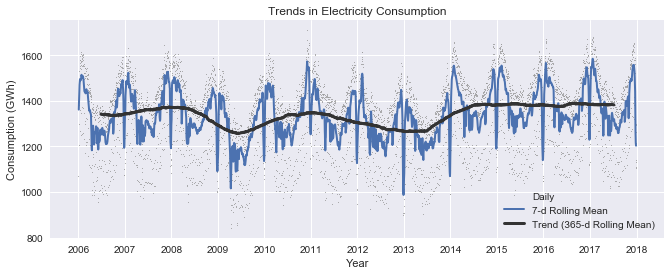

In [162]:
fig, ax = plt.subplots()
ax.plot(daily_opsd['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(daily_opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(daily_opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

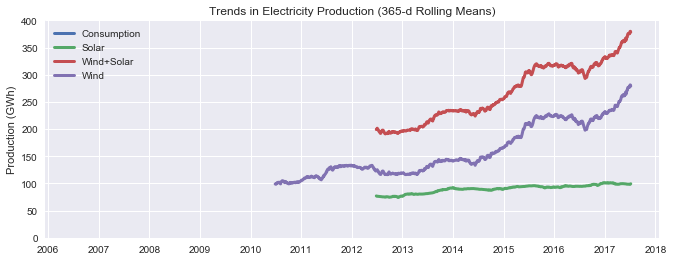

In [163]:
fig, ax = plt.subplots()
for column in ['Consumption', 'Solar', 'Wind+Solar', 'Wind']:
    ax.plot(daily_opsd_365d[column], linewidth=3, label=column)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

In [ ]:
t 